In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
# import the fastai library
from fastai.vision import *
from fastai.metrics import accuracy, error_rate

In [8]:
# create an empty list of domestic animals 
domestic_animals = ["cat","dog","goat", "sheep", "cow", "chicken", "dove", "pig", "duck", "turkey", "camel", "donkey", "horse"]

# create a folder to store the data and path to the folder
path = Path('data/')

#create an empty list to store the images
folder = []

# loop through the domestic animals
for i in domestic_animals:
  # assign path to the animals in the list
  dest = path/i
  # create directories/folders to store the images
  dest.mkdir(parents=True, exist_ok=True)
  # add to the empty list
  folder.append(dest)

In [9]:
# create an empty list to store the csv files
csv = []
for j in domestic_animals:
  files = j+'.csv'
  csv.append(files)

In [10]:
folder

[PosixPath('data/cat'),
 PosixPath('data/dog'),
 PosixPath('data/goat'),
 PosixPath('data/sheep'),
 PosixPath('data/cow'),
 PosixPath('data/chicken'),
 PosixPath('data/dove'),
 PosixPath('data/pig'),
 PosixPath('data/duck'),
 PosixPath('data/turkey'),
 PosixPath('data/camel'),
 PosixPath('data/donkey'),
 PosixPath('data/horse')]

In [11]:
csv

['cat.csv',
 'dog.csv',
 'goat.csv',
 'sheep.csv',
 'cow.csv',
 'chicken.csv',
 'dove.csv',
 'pig.csv',
 'duck.csv',
 'turkey.csv',
 'camel.csv',
 'donkey.csv',
 'horse.csv']

In [12]:
# download the images and store them in folders created
m = 0

while m < len(csv):
  # using the download_images function to download 300 images for each category
  download_images(path/csv[m], folder[m], max_pics=300)
  m += 1

In [13]:
# def download_images(classes):
  
#   path = Path('data/')

#   folder = []

#   for i in classes:
#     dest = path/i
#     dest.mkdir(parents=True, exist_ok = True)
#     folder.append(dest)


#   csv = []

#   for j in classes:
#     files = j+'.csv'
#     csv.append(files)


#   m = 0

#   while m < len(csv):
#     download_images(path/csv[m], folder[m], max_pics=300)
#     m += 1 


#   return path.ls()  


In [14]:
# verify the classes that we have to ensure no corrupt images
for c in domestic_animals:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

cat


dog


goat


sheep


cow


chicken


dove


pig


duck


turkey


camel


donkey


horse


In [15]:
# visualize the downloaded data
# select a random seed
np.random.seed(42)

# loading the data
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.3, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [16]:
# view the classes
data.classes

['camel',
 'cat',
 'chicken',
 'cow',
 'dog',
 'donkey',
 'dove',
 'duck',
 'goat',
 'horse',
 'pig',
 'sheep',
 'turkey']

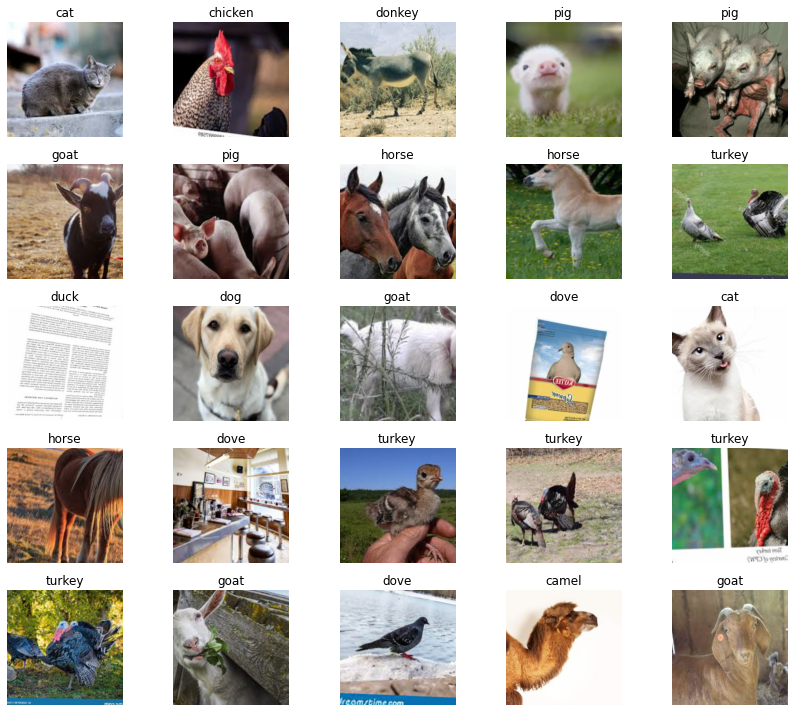

In [17]:
# view the data
data.show_batch(5, figsize=(12,10))

In [23]:
# create a model and initial training 
# creating a convolutional neural network using create_cnn
learn = create_cnn(data, models.resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [24]:
defaults.device = torch.device('cuda') # use the gpu
# train the layers 
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.949130,0.560729,0.830769,0.169231,00:42
1,1.109706,0.495173,0.862393,0.137607,00:41
2,0.759538,0.468994,0.862393,0.137607,00:41
3,0.566120,0.437544,0.873504,0.126496,00:41
4,0.447049,0.430146,0.870940,0.129060,00:41


In [25]:
#the model architecture
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [26]:
# unfreeze to train the whole network 
learn.unfreeze() 

In [27]:
# find the perfect learning rate >> Differential learning rate
learn.lr_find

<bound method lr_find of Learner(data=ImageDataBunch;

Train: LabelList (2730 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
duck,duck,duck,duck,duck
Path: data;

Valid: LabelList (1170 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
turkey,horse,dog,donkey,sheep
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

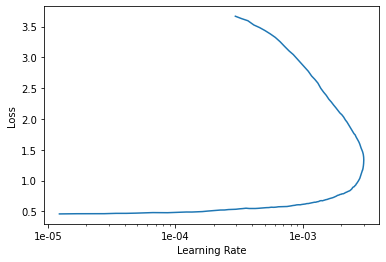

In [28]:
# visualize the learning rates
learn.recorder.plot()

* looking for the steepest downward slope 

In [29]:
# train the model using differential learning rates 
learn.fit_one_cycle(4, max_lr=slice(3e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.363523,0.404660,0.882906,0.117094,00:44
1,0.349942,0.366838,0.895727,0.104274,00:44
2,0.285588,0.357268,0.897436,0.102564,00:43
3,0.248744,0.355194,0.899145,0.100855,00:43


In [30]:
# save the model
learn.save("part1")

## Improve the model by cleaning the images

In [31]:
# using image cleaner 
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [33]:
# results are saved as cleaned.csv 
df = pd.read_csv(path/'cleaned.csv', header='infer')
df.head()

,name,label
0,duck/00000256.jpg,duck
1,duck/00000238.jpg,duck
2,duck/00000208.jpg,duck
3,duck/00000156.jpg,duck
4,duck/00000049.jpg,duck


In [37]:
db = (ImageList.from_df(df,path)
                   .random_split_by_pct(0.2)
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch(bs=8)).normalize(imagenet_stats)

In [40]:
# difference after deleting the images
print(data.classes, data.c, len(data.train_ds), len(data.valid_ds))
print(db.classes, db.c, len(db.train_ds), len(db.valid_ds))

['camel', 'cat', 'chicken', 'cow', 'dog', 'donkey', 'dove', 'duck', 'goat', 'horse', 'pig', 'sheep', 'turkey'] 13 2730 1170
['camel', 'cat', 'chicken', 'cow', 'dog', 'donkey', 'dove', 'duck', 'goat', 'horse', 'pig', 'sheep', 'turkey'] 13 2152 538


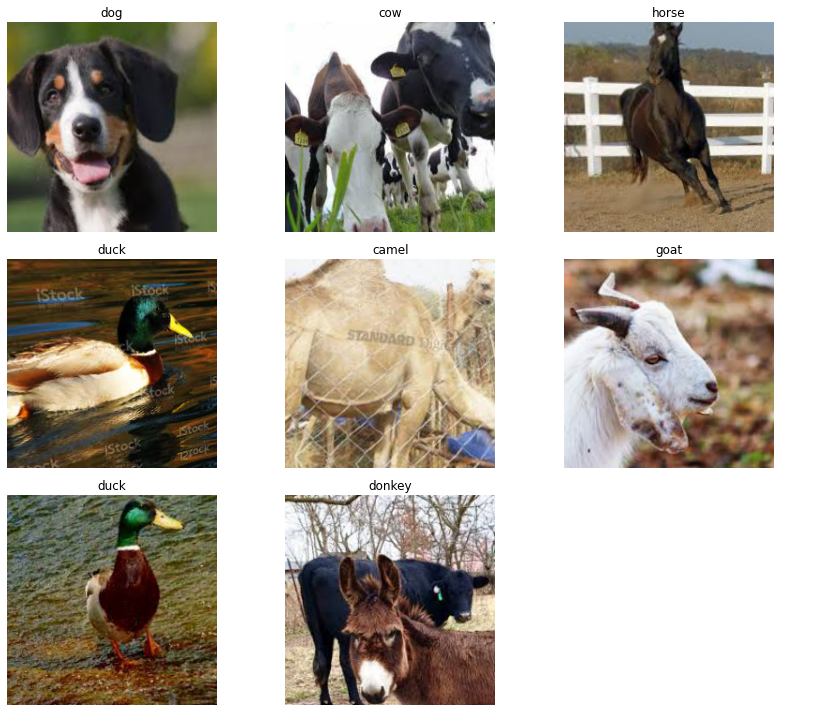

In [43]:
# view a batch from db
db.show_batch()

In [44]:
# load the saved model
learn.load("part1")

Learner(data=ImageDataBunch;

Train: LabelList (2730 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
duck,duck,duck,duck,duck
Path: data;

Valid: LabelList (1170 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
turkey,horse,dog,donkey,sheep
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

In [45]:
# replace the data
learn.data = db

In [46]:
learn.freeze()

In [47]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.759250,0.255964,0.920074,0.079926,00:37
1,0.940927,0.272880,0.910781,0.089219,00:36
2,0.595781,0.197411,0.936803,0.063197,00:36
3,0.666613,0.168374,0.936803,0.063197,00:36


In [48]:
learn.unfreeze

<bound method Learner.unfreeze of Learner(data=ImageDataBunch;

Train: LabelList (2152 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
duck,duck,duck,duck,duck
Path: data;

Valid: LabelList (538 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
donkey,dove,donkey,dog,sheep
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

In [49]:
learn.save('Final')

## Evaluation

In [50]:
# use ClassificationInterpretation 
classif = ClassificationInterpretation.from_learner(learn)

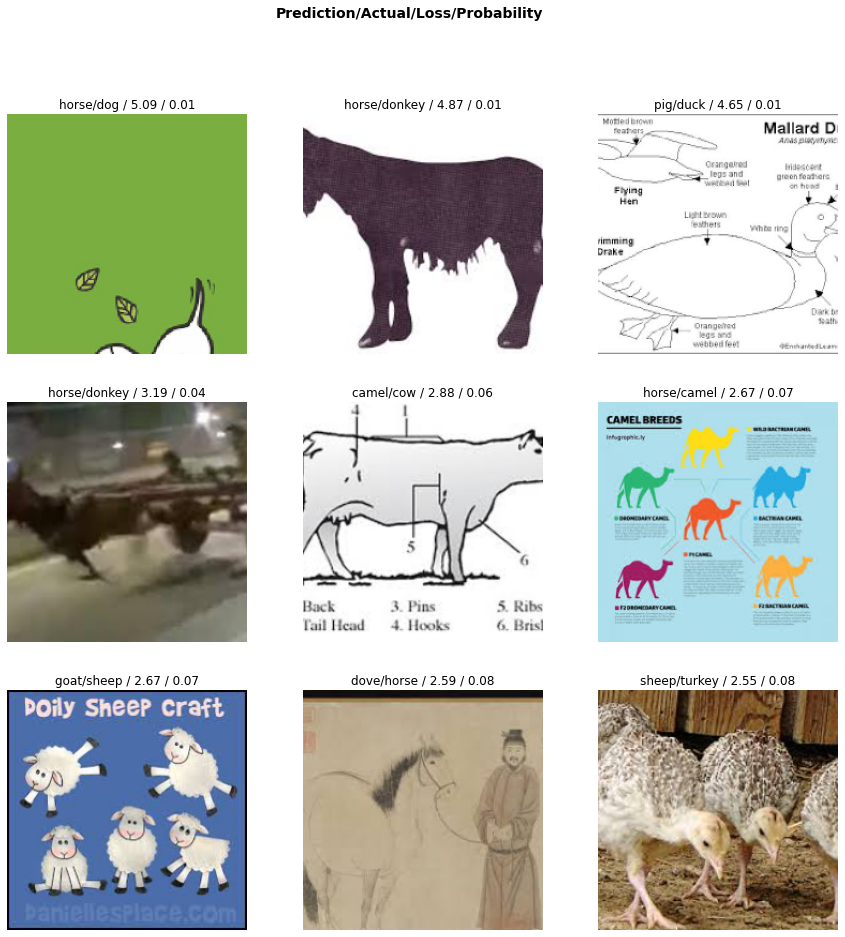

In [54]:
# plot the top losses 
classif.plot_top_losses(9, figsize=(15,15))

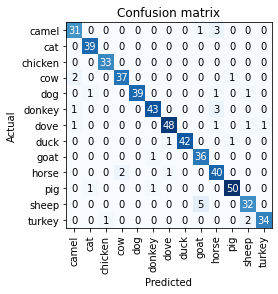

In [51]:
# display on confusion matrix
classif.plot_confusion_matrix()

In [56]:
# export the model for deployment
learn.export('/content/model.pkl')